# Random graphs

<div style="display: flex; align-items: center;">
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/docs/m08-randomgraphs/lab08.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" style="vertical-align: -8px; margin-right: 10px;" />
        Open this notebook in Google Colab
    </a>
</div>


<div style="display: flex; align-items: center;">
    <a href="https://raw.githubusercontent.com/yy/netsci-course/master/docs/m08-randomgraphs/lab08.ipynb" download>
        <img src="http://yyahn.com/netsci-course/images/download_icon.png" style="vertical-align: -8px; margin-right: 10px;" />
        Download this notebook (File -> Save As)
    </a>
</div>

## What are the random graph models?

"Random graph models" may refer a wide range of models where randomness is involved in the generation of the graph, particularly in the edge formation. But, the most basic random graph models — that are usually referred as random graph models — are the Erdős-Rényi (ER) model and the configuration model. They both are commonly used as "null models" — the models that show us what we would expect if we don't know anything about the graph other than basic properties of the graphs — in network science. 

## Why random graphs?

Probably the most important reason to study random graphs is that they provide a baseline for comparison, or act as "null models". Let's say you collected a network data and found that the average clustering coefficient of the network is 0.5. Is this high or low? 

<img src="https://yyiki.s3.us-east-2.amazonaws.com/public/imgs/is_four_a_lot-depends_on_contexts.jpg" width="400" />

If the network is large and very sparse, 0.5 may be almost impossibly high. On the other hand, if the network is extremely dense, then 0.5 may be extremely low. So, it is hard to say! What could be useful contexts? 

## ER random graph

One useful context can be an ER random graph with the same number of nodes and edges. This model answers the following question: "if we only know the number of nodes and edges, and nothing else, what would be the average clustering coefficient that we would expect?" We can create many instances of ER random graphs and calculate the average clustering coefficient. Then, we can compare the average clustering coefficient of the real network with the distribution of the average clustering coefficient of the ER random graphs!

Let's try with the dolphins network. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


dolphin_net = nx.read_gml("dolphins.gml")

**Q: Shall we measure the average clustering coefficent of this network?**

In [2]:
# YOUR SOLUTION HERE

Average clustering coefficient: 0.259


Let's then create many instances of ER random graphs with the exactly same number of nodes and edges as the dolphins network, and calculate the average clustering coefficient.

**Q: plot the distribution of the average clustering coefficient of many (say 1,000) ER random graphs.**

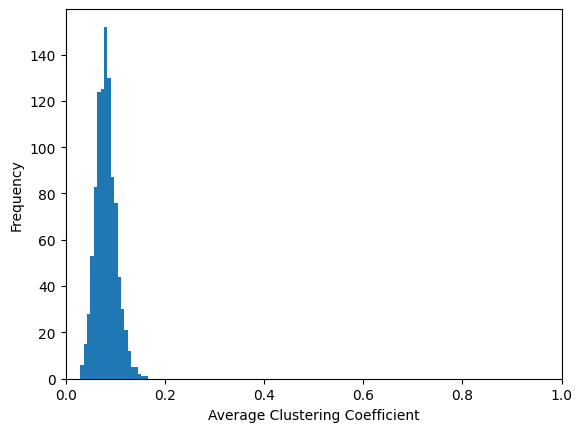

In [4]:
# YOUR SOLUTION HERE

**Q: where is the actual average clustering coefficient of the dolphins network in the distribution? Can you show it?**

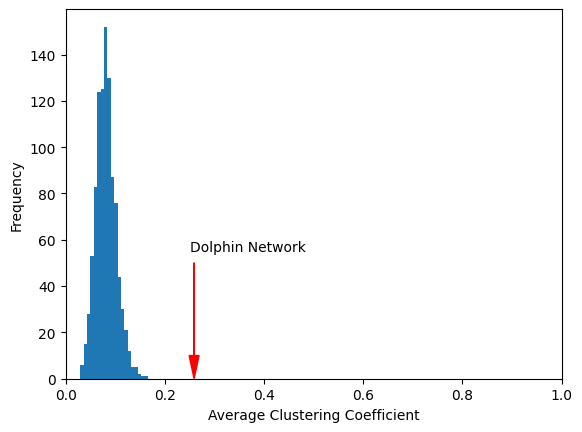

In [5]:
# YOUR SOLUTION HERE

It seems like the actual network has a much higher average clustering coefficient than the ER random graphs. This makes sense because the dolphins network is a social network, and social networks tend to have a high average clustering coefficient. 

But, let's think about the ER random graph model. Is the model a good null model for the dolphins network? Or, can it possibly be _too random_? Which of the important network properties does the ER random graph model not capture?

## Configuration model

One very important property that the ER random graph model does not capture is, of course, the *degree distribution*. The degree distribution of the ER random graph is binomial (Poisson), which is very different from the degree distribution of the real networks. Let's check how different the degree distribution of the dolphins network is from the binomial distribution.

Before doing this, here's a useful plot for showing the degree distribution of a small network. 

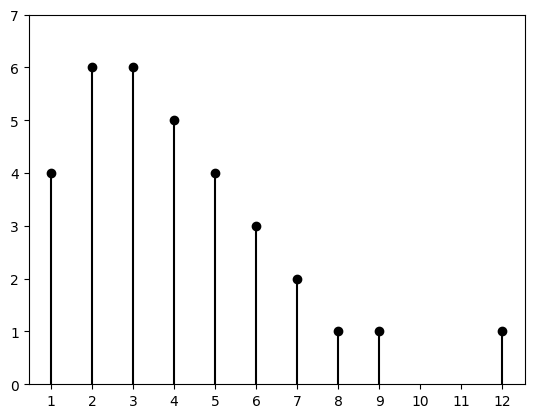

In [6]:
# Say, there are 4 nodes with degree 1, 6 nodes with degree 2, etc. 
degree_counts = {1: 4, 2: 6, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1, 9: 1, 12: 1}
plt.ylim(0, 7)
plt.xticks(range(1, 13))
for d, c in degree_counts.items():
    plt.plot([d, d], [0, c], 'k-')  # the pin/stem 
    plt.plot(d, c, 'ko')  # the "head"

**Q: can you plot the degree distribution of the dolphins network?**

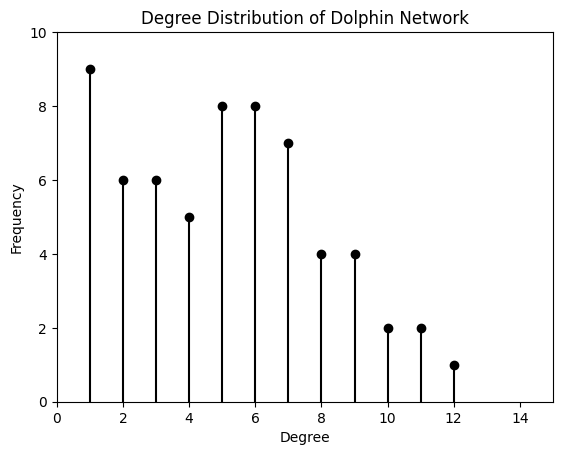

In [7]:
# YOUR SOLUTION HERE

Let's generate an instance of ER random graph with the same number of nodes and edges, and plot the degree distribution of the ER random graph.

**Q: can you plot the degree distribution of the ER random graph with the actual degree distribution of the dolphins network?**

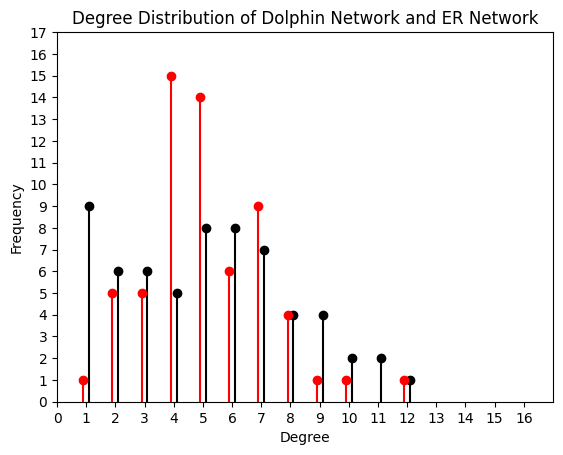

In [9]:
# You can use offset to make the dots and lines distinguishable.

# offset = 0.1
# ...
# 
# for d, c in degree_counts.items():
#     plt.plot([d+offset, d+offset], [0, c], 'k-')
#     plt.plot(d+offset, c, 'ko')
#
# for d, c in er_degree_counts.items():
#     plt.plot([d-offset, d-offset], [0, c], 'r-')
#     plt.plot(d-offset, c, 'ro')


# YOUR SOLUTION HERE

Although the difference is not dramatic, it seems to hint that the actual dolphin network may have slightly more nodes with high degrees than what we would expect from the ER random graph model. Let's check another network. This time, the famous karate club network. 

**Q: create the same plots for the karate club network.**

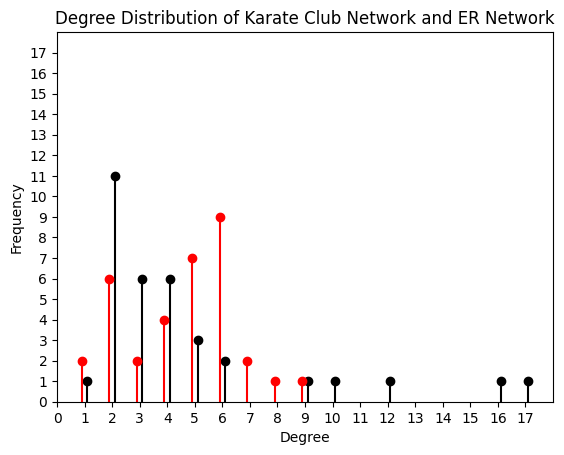

In [10]:
# YOUR SOLUTION HERE


The discrepancy is even more dramatic in the karate club network. 

The thing is that the degree distribution is a very important property of the network. Degree distribution has an outsized impact on many network properties. For example, having hubs can dramatically decrease the average distance between nodes. Clustering coefficient is also affected by the degree distribution.

In other words, the ER random graph model may be "too random" because it does not capture the degree distribution of the real networks. Is there any way to generate random graphs that exactly capture the degree distribution of the real networks, while keeping everything else random?

That's where the "configuration model" comes in. The configuration model generates random graphs that have the same degree distribution as the real network. In other words, it keeps the degree sequence of the real network, in addition to the number of nodes and edges. You can picture the configuration model as follows:

1. Break all the existing edges in the real network while keeping the "ends" of the edges (edge stubs) intact. If a node has degree $k$, then it keeps $k$ edge stubs.
2. Randomly pick a pair of edge stubs and connect them. 
3. Repeat step 2 until all edge stubs are exhausted.

Easy enough, right? Why don't you try a very small example by hand? You may encounter a few tricky cases. Did you find them? 

<details class="warning-class"><summary>Solution</summary><p>Here's the tricky part. What if you are only left with two edge stubs connected to a single node? Should you connect them to create a self-loop? Or, should you just leave them unconnected? Or, what if two edge stubs that you pick are connected to the two nodes that are already connected? Should you connect them to create multiple edges between two nodes? Or should you find another pair? 

Another issue is that this process may generate a network with multiple components, even if the original network is connected. You want to be careful not to assume that the generated network is connected!
</p></details>



You can create an instance of the configuration model using `nx.configuration_model` as follows:

Multiple edges: {(17, 29), (14, 20), (32, 33), (42, 47), (41, 45), (36, 51), (6, 51), (9, 33), (8, 15)}
Self-loops: {16, 33}


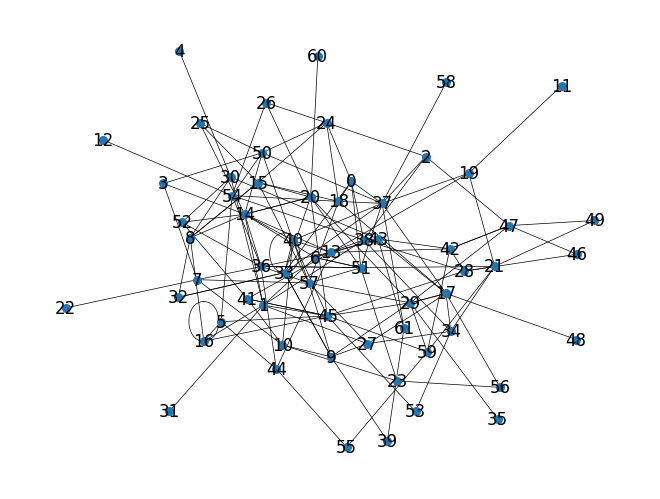

In [11]:
random_dolphin_net = nx.configuration_model([d for n, d in dolphin_net.degree()])

# check multiple edges
multiedges = set()
for n1, n2 in random_dolphin_net.edges():
    if random_dolphin_net.number_of_edges(n1, n2) > 1:
        multiedges.add((n1, n2))
print("Multiple edges:", multiedges)

# self loops
selfloops = set()
for n in random_dolphin_net.nodes():
    if random_dolphin_net.has_edge(n, n):
        selfloops.add(n)
print("Self-loops:", selfloops)

nx.draw(random_dolphin_net, node_size=30, width=0.5, with_labels=True)

As you repeatedly run this code, you can probably see that the multiedges and self-loops are almost always present, and the network is sometimes disconnected. 

Always be aware of these issues! Don't just assume that the network generated from the configuration model is connected and has no multiedges or self-loops, all of which make it tricky to compute many network properties. 

You may be wondering, "why don't we just rewire the multi-edges and self-loops until we don't have any?" That's a good question! In fact, that's what people do to make the network more "clean". This can be done by 'edge swapping', a process that swaps a pair of edges so that all the degrees are preserved. We can keep doing this until we don't have any multi-edges or self-loops. The problem is that this process makes the network properties biased! So this is not perfect. To make the network truly random and unbiased, we need to allow multi-edges and self-loops.

## Let's do some comparisons!

Let's try the clustering coefficient comparison that we did above with two networks (dolphins and karate club) and two null models (ER and configuration model). For multi-edges and self-loops, let's do a quick-and-dirty thing: just remove them.

You can do the following to remove them. 

In [12]:
g = nx.Graph(random_dolphin_net)
g.remove_edges_from(nx.selfloop_edges(g))

# check multiple edges
multiedges = set()
for n1, n2 in g.edges():
    if g.number_of_edges(n1, n2) > 1:
        multiedges.add((n1, n2))
print("Multiple edges:", multiedges)

# self loops
selfloops = set()
for n in g.nodes():
    if g.has_edge(n, n):
        selfloops.add(n)
print("Self-loops:", selfloops)


Multiple edges: set()
Self-loops: set()


**Q: let's compare the average clustering coefficient of the real networks with the average clustering coefficient of the ER random graph and the configuration model.**

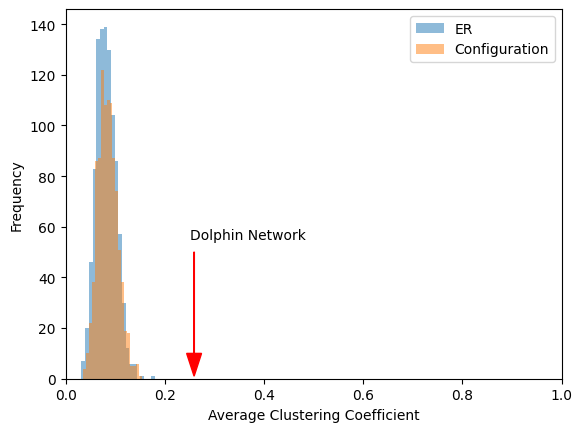

In [13]:
# Dolphins

# YOUR SOLUTION HERE



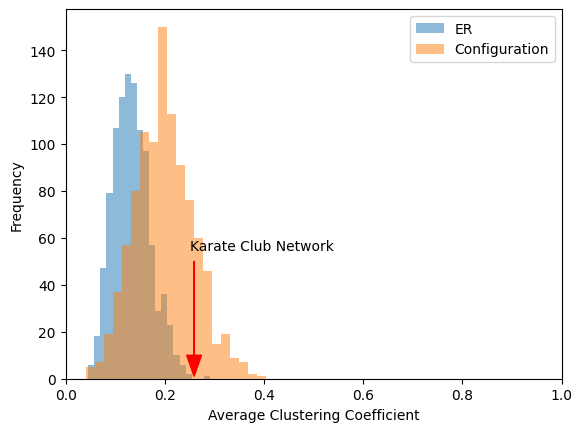

In [29]:
# karate club

# YOUR SOLUTION HERE

Interesting! For the dolphin network, both random graph models produce very similar distributions of the average clustering coefficient, which is much smaller than the actual average clustering coefficient of the dolphin network. However, for the karate club network, the two distributions are quite different. According to the ER random graph model, the average clustering coefficient of the karate club network is much higher than what we would expect. On the other hand, if we consider the configuration model, the average clustering coefficient of the karate club network is not at all surprising, but it is what's expected from the degree distribution! 

This difference is likely due to the fact that the Karate Club network has several hubs with large degrees, which is not captured by the ER random graph model. 

Let's try another comparison, this time with a statistical test. 

## Testing assortativity 

Lets try another mock hypothesis using the [dolphin social network](http://www-personal.umich.edu/~mejn/netdata/dolphins.zip). My hypothesis is that dolphins have a posh and very exclusive culture. Popular dolphins only hang with other popular dolphins, while the loners are stuck to mingle among themselves. A sad state of affairs, but social life is hard in the pods. How might we test this?

There happens to be a similarity measure called [assortativity](https://en.wikipedia.org/wiki/Assortativity) where nodes of a certain type tend to be connected to nodes of the same type. In networkx there is a function called [degree assortativity](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html?highlight=degree_assortativity_coefficient#networkx.algorithms.assortativity.degree_assortativity_coefficient) which tells us how strongly nodes of similar degree are attached to each other. If the network has high degree assortativity, then low degree nodes will be connected to other low degree nodes, and high degree nodes will be connected to other high degree nodes. Conversely, low degree assortativity (or even disassortativity) would imply no (or negative) relationship. 

Excellent, so we have a measure, but what do we compare our graph too? It wouldn't really be appropriate to compare it to an ER graph because the nodes all have different degrees which are about the same and normally distributed. Instead, we want to compare our dolphin network to a graph with the same degree distribution, and that is where the configuration model comes in.

We are going to do a rough test for our hypothesis by calculating the z-score for our dolphin network's degree assortativity coefficient. We will do this by generating a bunch of configuration models based on the dolphin degree sequence and calculating the assortativity coefficient for those null graphs. We can then compare our real network with the null model. If our z-score is high then it is unlikely that the dolphin network's assortativity can be accounted for by just the degree-sequence of a random graph, which means something more interesting is at work.

Lets carry out this experiment:

In [14]:
import scipy.stats as stats

dolphin_net = nx.read_gml("dolphins.gml")
dolphin_net = nx.Graph(dolphin_net)


Now that the graph is loaded in lets calculate the degree assortativity:

In [15]:
real_assortativity = nx.degree_assortativity_coefficient(dolphin_net)
print(real_assortativity)

-0.04359402821531255


Interesting! So it appears that the network is disassortative, so it seems like our hypothesis about the dolphins is falling appart, but we still need to compare it to a null model in order to determine whether there is anything of interest to be pursued here.

**Q: can you calculate the degree assortativity of the configuration model and compare it to the degree assortativity of the dolphin network?**

In [16]:
# YOUR SOLUTION HERE

Now we can calculate the z-scores using scipy's [zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) function. It will print out the z-scores for all the elements of the distribution. If we assume that the dolphin network came from the null distribution then we can calculate the z-score for the dolphin network:

In [17]:
# Prepend the real assortativity to the model list and have scipy calculate the zscores
zscores = stats.zscore([real_assortativity] + model_assortativity)

# Just print out the first score which corresponds to the real network
print(zscores[0])

-0.006337357506093644


A z-score corresponds to how many standard deviations out from the mean the sample is. A score of +1 would be one standard deviation above the mean. Since the score is close to zero we can safely conclude that the disassortativity we observed in the dolphin network is explainable entirely from the degree sequence and no other special properties of the network.

However, this doesn't mean there aren't low-level features hidden in the network. The degree assortativity score is an aggregative measure, and it can obfuscate local deviations from assortativity that are non-random. There is also a score for the local degree assortativity, but we will not pursue that further here.

Now that we have a distribution of null assortativities we can also visualize the distribution and plot our dolphin network's assortativity along with it:

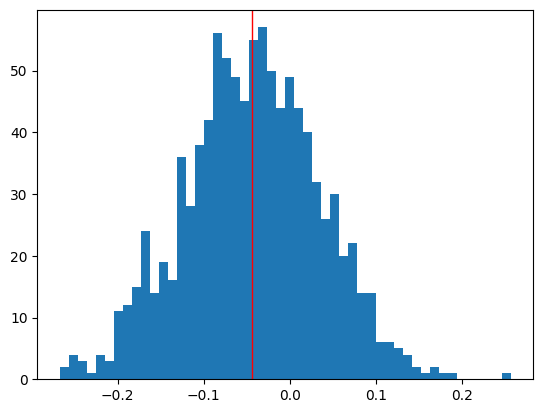

In [18]:
plt.hist(model_assortativity, bins=50)
plt.axvline(real_assortativity, lw=1, color="red") 
plt.show()

And there we have it! We have fair reason to conclude that not only is the hypothesis wrong but the surprising disassortativity we found really wasn't anything special after all. [note: reference for [`axvline`](http://matplotlib.org/api/pyplot_api.html?highlight=axvline#matplotlib.pyplot.axvline) in matplotlib]

## Now try it yourself!

1. Pick a graph of your choosing. You can use the graphs you are using for your project or any other real-world graph. Here are a couple places you can find some: [pajek datasets](http://vlado.fmf.uni-lj.si/pub/networks/data/), [Newman's datasets](http://www-personal.umich.edu/~mejn/netdata/). [note: if you use directed graphs makes sure you use the corresponding function [`directed_configuration_model`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.directed_configuration_model.html?highlight=configuration_model#networkx.generators.degree_seq.directed_configuration_model)]

2. Construct two simple hypotheses around two different measures that you can calculate from the graph. Here is a [list of algorithms that networkx has](https://networkx.github.io/documentation/stable/reference/algorithms/index.html). You aren't limited by measures networkx can calculate. However, do not use a measure that depends entirely on the degree sequence. For instance, it would be silly to compare average degree to the random networks generated by the configuration model because it uses the same degree sequence and so will have the same average degree.

3. Carry out a simple hypothesis test for both hypotheses. It can be similar to what I showed here. You are welcome to carry it out in a more robust manner, but the focus of this assignment is getting a hang of using configuration models as null models. Here is a link to [Statistics for Hackers](https://speakerd.s3.amazonaws.com/presentations/7e68b43159d646cf81eda9e1bded8213/Statistics_for_Hackers_-_PyCon2016.pdf). It has a nice little python tutorial for how you can carry out hypothesis testing without all the hard math. Even if you don't use it for this assignment I highly recommend checking it out.

4. Provide quantitative analysis and a graphical illustration of your results. It should be clear that your hypothesis was validated/invalidated/inconclusive.

5. Answer the following questions:
  * What graph are you using?
  * What are you hypotheses?
  * What measures will you be using to test your hypotheses? How do these measures accomplish this?
  * Explain your results. Were they surprising? Did they confirm or reject your hypotheses?
  * From these tests, what have you learned about the structure of the network you were investigating?

6. Once you are complete submit your Jupyter notebook to Canvas.